
### Programación para Análisis de datos
- Luis Roberto Chávez Mancilla
- José Emiliano Figueroa Hernández
- Samantha Abigail Quintero Valadez
- Axel Escoto García
## Stroke Prediction

Este es un caso donde se analizaran distintos pacientes y sus caracteristicas clinicas. Es un conjunto de datos de análisis con una muestra de 5110 pacientes. El data set se obtuvo de: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

__Sigificado de los campos__

__gender__ : "Male", "Female" or "Other"/ nominal

__age__: Edad del paciente / razón

__hypertension__: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión/ nominal

__heart_disease__: 0 si el paciente no tiene enfermedad en el corazón, 1 si el paciente tiene enfermedad en el corazón / nominal

__work_type__: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"/ nominal

__Residence_type__: "Rural" or "Urban"/ nominal

__avg_glucose_level__: promedio de glucosa en la sangre / razón

__bmi__: índice de masa corporal / razón

__smoking_status__: "formerly smoked", "never smoked", "smokes" or "Unknown"* / nominal

__stroke__: 1 si el paciente tuvo un derrame, 0 si no tuvo un derrame / nominal 

# Preguntas de investigación
- ¿La edad puede ser un factor importante para este tipo de afección?
- ¿Se puede relacionar el fumar con este tipo de problema?
- ¿Cuales son los datos que más se ligan a la aparición de la enfermedad?
- ¿Podríamos predecir si alguien sería propenso a este tipo de afección?
- ¿Es más probable que una mujer padezca un derrame a que lo padezca un hombre?

In [70]:
import pandas as pd
import seaborn as sns
from lifelines import ExponentialFitter
import matplotlib.pyplot as plt


In [71]:
# Para obtener múltiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [72]:
# Leemos los datos mediate el encoding utf-8
data = pd.read_csv("stroke.csv", encoding="utf-8")

In [73]:
#Creamos un backup (copia profunda de los datos) de los datos
data_backup= data.copy()

In [74]:
# Columnas del data set
columns=data.columns
columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Tipos de datos

In [75]:
nominal=["gender","hypertension", "heart_disease","work_type","Residence_type", "smoking_status", "stroke"]
ordinal=[]
interval=[]
ratio=["age", "avg_glucose_level","bmi"]

# Conversion de nominal a categorico

In [76]:
for i in nominal:
    data[i] = data[i].astype("category")

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   category
dtypes: category(7), float64(3), int64(1), object(1)
memory usage: 235.7+ KB


Ahora todos los datos nominales estan en tipo categorico de pandas.

# Datos unicos en los categoricos

In [78]:
for i in nominal:
    print("\nVar: ",i)
    print(data[i].unique())


Var:  gender
['Male', 'Female', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']

Var:  hypertension
[0, 1]
Categories (2, int64): [0, 1]

Var:  heart_disease
[1, 0]
Categories (2, int64): [0, 1]

Var:  work_type
['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Categories (5, object): ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']

Var:  Residence_type
['Urban', 'Rural']
Categories (2, object): ['Rural', 'Urban']

Var:  smoking_status
['formerly smoked', 'never smoked', 'smokes', 'Unknown']
Categories (4, object): ['Unknown', 'formerly smoked', 'never smoked', 'smokes']

Var:  stroke
[1, 0]
Categories (2, int64): [0, 1]


### Hallazgos
Tenemos 4 variables dicotómicas: hypertension, heart_disease, Residence_type, y stroke. El resto varian entre 3 a 5 posibles valores lo cual los hace tener una mayor cardinalida sobre el resto, sindo la más alta el tipo de trabajo de la persona observada o work_type.

Todas las variables categoricas son de baja cardinalidad.

## Exploración de cantidad de muestras por categoría


In [79]:
#Sam :)
for i in nominal + ordinal:
    data[i].value_counts()
    print()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

hypertension
0    4612
1     498
Name: count, dtype: int64

heart_disease
0    4834
1     276
Name: count, dtype: int64

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

stroke
0    4861
1     249
Name: count, dtype: int64

### Hallazgos
*Samantha*
+ Para la variable de heart_disease podemos ver que hay un desvalance entre los datos ya que la mayoria de los pacientes de la muestra no presentan enfermedades en el corazón, solo 276 de la población total presentó este tipo de problema

*Axel*
+ Para el genero solo tenemos una fila con valor "other" y el resto estan relativamente equilibradas, teniendo solo un 9% de diferencia entre hombre y mujer (mayor).
+ En el dato de "stroke" tenemos que solamente un 5% presentó este problema y el 95% restante no ha sufrido de este.
+ La variable de "smoking_status" presenta un problema al tener 1544 datos desconocidos, osea que no se sabe si el paciente fue, es o no es fumador.

# Estadisticas descriptiva de las columnas


In [80]:
#Sam :)
for i in nominal + ratio:
    print(i)
    data[i].describe()
    print()

gender


count       5110
unique         3
top       Female
freq        2994
Name: gender, dtype: object


hypertension


count     5110
unique       2
top          0
freq      4612
Name: hypertension, dtype: int64


heart_disease


count     5110
unique       2
top          0
freq      4834
Name: heart_disease, dtype: int64


work_type


count        5110
unique          5
top       Private
freq         2925
Name: work_type, dtype: object


Residence_type


count      5110
unique        2
top       Urban
freq       2596
Name: Residence_type, dtype: object


smoking_status


count             5110
unique               4
top       never smoked
freq              1892
Name: smoking_status, dtype: object


stroke


count     5110
unique       2
top          0
freq      4861
Name: stroke, dtype: int64


age


count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64


avg_glucose_level


count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64


bmi


count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

### Hallazgos
_Sam_
+ Para la variable de heart_disease que es nominal, vemos que la moda es 0 (No padecen de enfermedades del corazón), con una frecuencia de 4834 de los 5110
+ Para la variable de avg_glucose_level que es de razón pudimos obtener más datos, como lo es la media con un nivel de glucosa de 106.147677 y una desviación estandar de  45.283560

*Axel*
- Dentro de la edad podemos observar que tenemos un valor mínimo de 0.8, lo cual puede significar un recien nacido y tambien tenemos un máximo de 82 años, lo cual puede significar que tenemos una variedad de datos, inclusive de pacientes muy jovenes.

# Limpieza

- Decidir que hacer con datos unknown
- Decidir que hacer con datos NaN- inexistentes

# Porcentajes de datos por categorico

In [81]:
for i in nominal:
    print("\nVar: ", i)
    print(data[i].value_counts(normalize=True)*100)


Var:  gender
gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64

Var:  hypertension
hypertension
0    90.254403
1     9.745597
Name: proportion, dtype: float64

Var:  heart_disease
heart_disease
0    94.598826
1     5.401174
Name: proportion, dtype: float64

Var:  work_type
work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64

Var:  Residence_type
Residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64

Var:  smoking_status
smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64

Var:  stroke
stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


# Axel
Yo me encargaré del análisis univariado para las siguientes varaibles
- gender
- smoking status
- age


### Genero

In [82]:
# Obtenemos el conteo de los valores en los datos para graficar
pc_gender = data.gender.value_counts(normalize=True)*100
pc_gender

gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64

In [83]:
# Obtenemos la frecuencia de cada categoria
freq_gender=data.gender.value_counts()
freq_gender, freq_gender.values

(gender
 Female    2994
 Male      2115
 Other        1
 Name: count, dtype: int64,
 array([2994, 2115,    1]))

([<matplotlib.patches.Wedge at 0x13330b390>,
 [Text(-0.29329251556156405, 1.0601789944700706, 'Female'),
  Text(0.2926407116602305, -1.0603590966644243, 'Male'),
  Text(1.0999997921700193, -0.0006761848226571827, 'Other')],
 [Text(-0.15997773576085308, 0.5782794515291293, '58.59%'),
  Text(0.1596222063601257, -0.5783776890896859, '41.39%'),
  Text(0.5999998866381923, -0.000368828085085736, '0.02%')])

<BarContainer object of 3 artists>

<Axes: xlabel='gender', ylabel='count'>

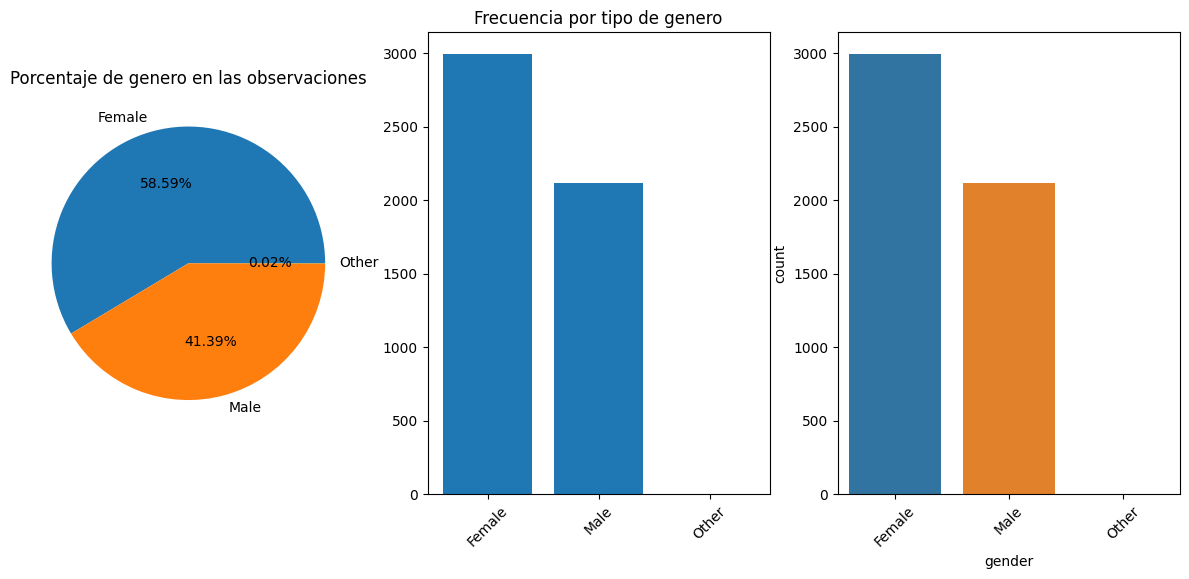

In [84]:
# Creamos las graficas graficas

fig, ax = plt.subplots(1,3, figsize=(15,6))
#Pie
ax[0].pie(pc_gender, 
        labels=pc_gender.index, 
        autopct="%.2f%%")
ax[0].title.set_text('Porcentaje de genero en las observaciones')
#Bar - Countplot
ax[1].bar(freq_gender.index,
        height=freq_gender.values) 
ax[1].title.set_text('Frecuencia por tipo de genero')
sns.countplot(data=data, x ="gender",ax=ax[2])
ax[1].tick_params(axis='x', rotation=45)
ax[2].tick_params(axis='x', rotation=45)

plt.show()

([<matplotlib.patches.Wedge at 0x132f97850>,
 [Text(-0.29329251556156405, 1.0601789944700706, 'Female'),
  Text(0.2926407116602305, -1.0603590966644243, 'Male'),
  Text(1.0999997921700193, -0.0006761848226571827, 'Other')],
 [Text(-0.19997216970106635, 0.7228493144114116, '58.59%'),
  Text(0.19952775795015715, -0.7229721113621075, '41.39%'),
  Text(0.7499998582977404, -0.00046103510635717, '0.02%')])

Text(0.5, 1.0, 'Porcentaje de genero en las observaciones')

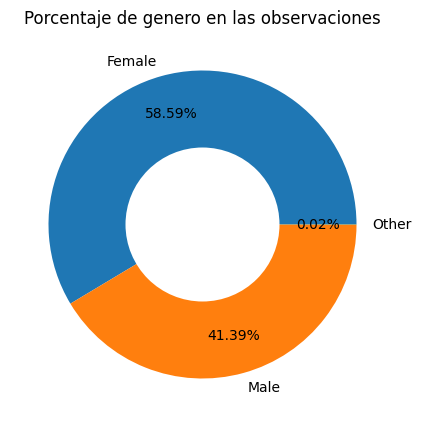

In [85]:
# Gráfica de dona

plt.pie(pc_gender, labels=pc_gender.index,
        autopct='%1.2f%%', pctdistance=0.75,
        )
centre_circle = plt.Circle((0,0), 0.5, fc="white")
fig = plt.gcf()
fig.set_figwidth(5)
fig.set_figheight(5)
fig.gca().add_artist(centre_circle)
plt.title("Porcentaje de genero en las observaciones")

plt.show()

#### Hallazgos de la variable genero
- Observamos que la mayoria de datos esta en la categoria "female", seguida por "male" por un 9% aproximadamente.
- La variable esta relativamente balanceada para los generos masculino y femenino, pero no para otros("other").

# Samantha

# Emiliano

# Roberto